# Results on the 100K movilens datasets

In [1]:
from alternating_least_square import AlternatingLeastSquare

# create object and get the data

In [2]:
data_dir = '../data/ml-latest-small/ratings.csv'
als_100k_data = AlternatingLeastSquare(data_dir, embedding_dim=80)

In [3]:
als_100k_data.get_data()

## Plotting

### Power law

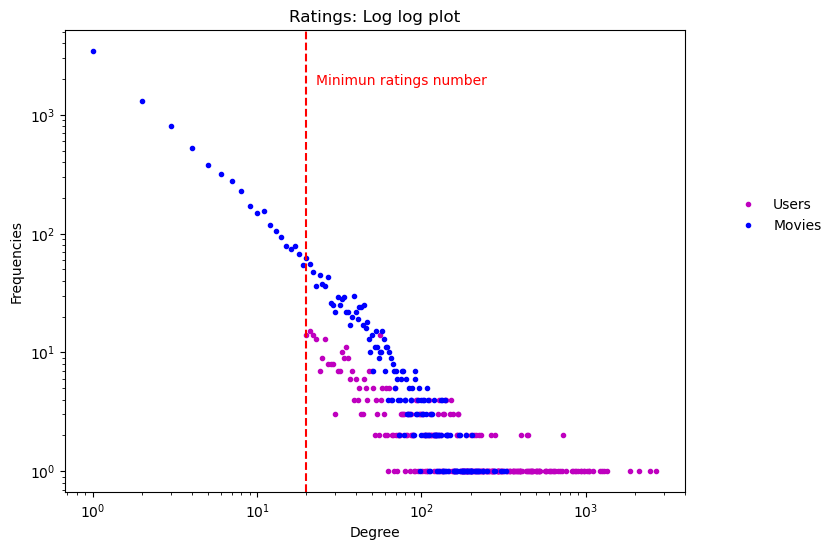

In [4]:
als_100k_data.plot_power_law()

### Ratings distribution

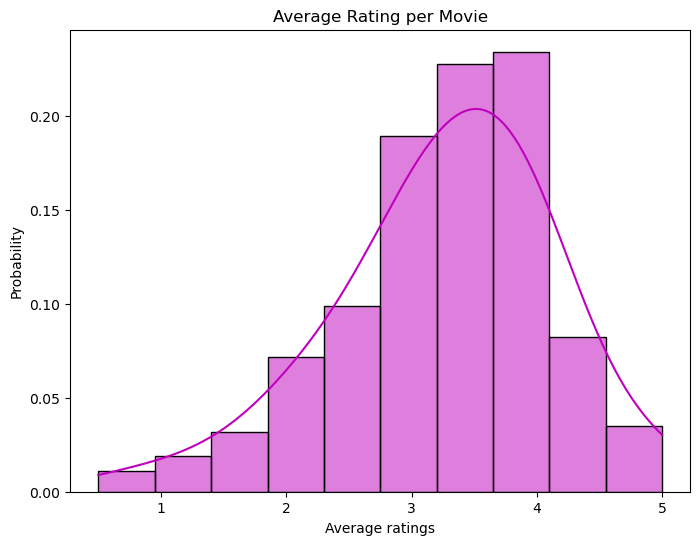

In [5]:
als_100k_data.plot_average_rating_hist()

## Train test split

In [6]:
als_100k_data.train_test_split()

## Run the model: biases + embeddings

In [8]:

user_biases, item_biases ,losses, rmse, losses_test, rmses_test= als_100k_data.alternating_least_square(als_100k_data.data_by_user_train, als_100k_data.data_by_movie_train, lambd=0.1, gamma=0.001, epochs = 100)

Training: 100%|██████████| 100/100 [09:43<00:00,  5.84s/epoch, test_rmse=0.97]


## Plot losses on training and test sets

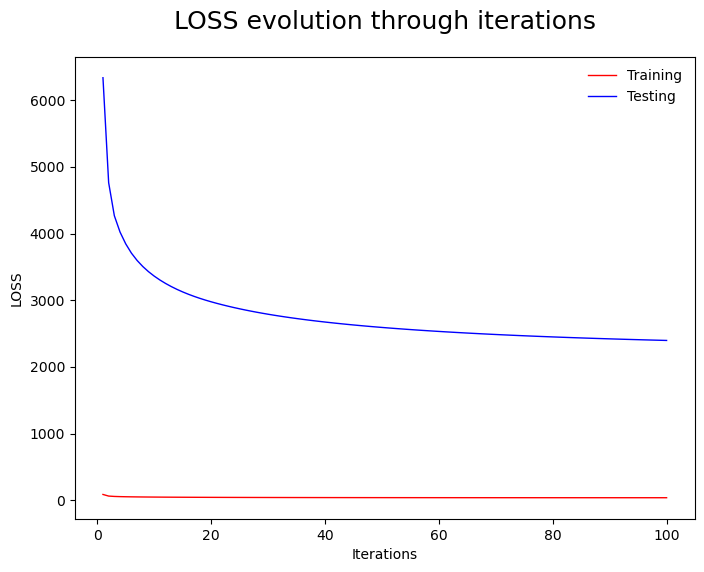

In [10]:
als_100k_data.line_plot(losses, losses_test, xaxis = "Iterations", yaxis = "LOSS", title="LOSS evolution through iterations")


## Plot RMSEs on training and test sets

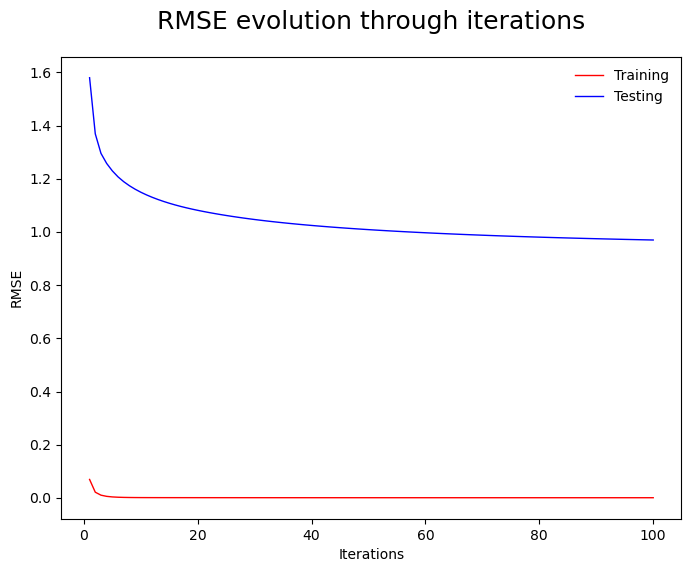

In [11]:
als_100k_data.line_plot(rmse, rmses_test, xaxis = "Iterations", yaxis = "RMSE", title="RMSE evolution through iterations")


# Results on the 25K movilens datasets

# create object and get the data

In [7]:

data_dir = '../data/ml-25m/ratings.csv'
als_25m_data = AlternatingLeastSquare(data_dir, embedding_dim=5)
als_25m_data.data_indexing()

## Plots

### Power law

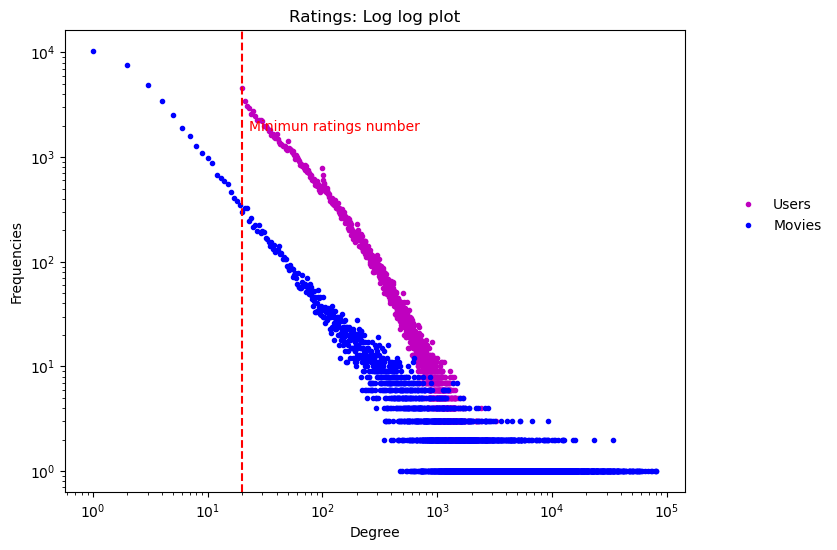

In [3]:
als_25m_data.plot_power_law()

### Ratings distribution

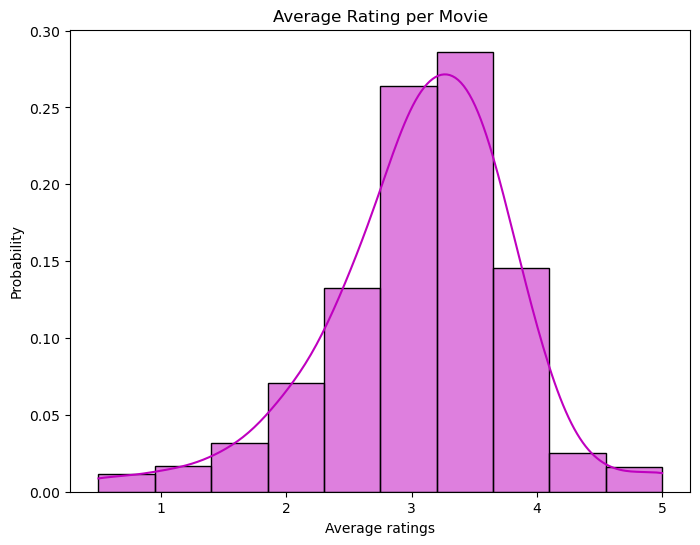

In [4]:

als_25m_data.plot_average_rating_hist()

## Train test split

In [8]:

als_25m_data.train_test_split()

## Run the model: biases + embeddings

In [14]:
user_biases, item_biases ,losses, rmse, losses_test, rmses_test= als_25m_data.alternating_least_square(als_25m_data.data_by_user_train, als_25m_data.data_by_movie_train, lambd=0.1, gamma=0.001, epochs = 20)

Training: 100%|██████████| 20/20 [45:42<00:00, 137.14s/epoch, test_rmse=0.853]


## Plot losses on training and test sets


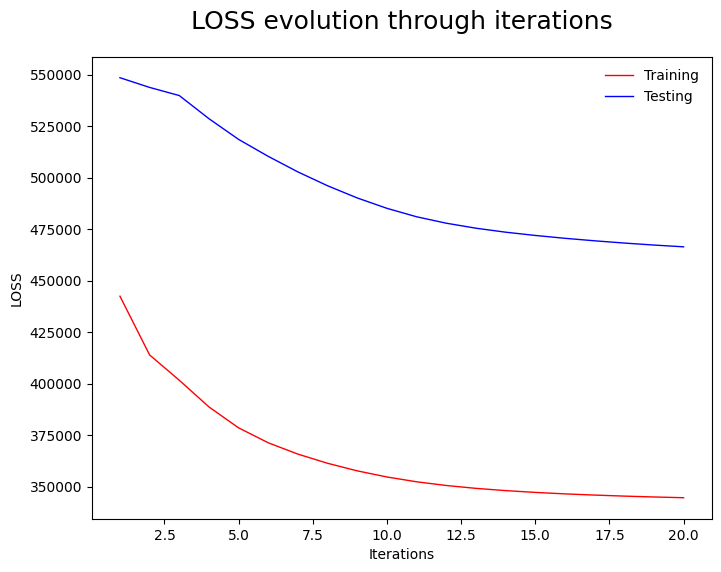

In [18]:
als_25m_data.line_plot(losses, losses_test, xaxis = "Iterations", yaxis = "LOSS", title="LOSS evolution through iterations")


## Plot RMSEs on training and test sets

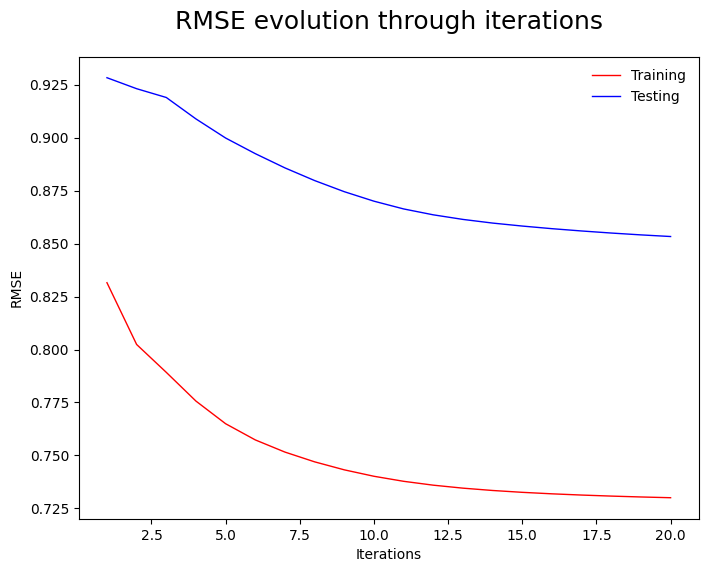

In [17]:

als_25m_data.line_plot(rmse, rmses_test, xaxis = "Iterations", yaxis = "RMSE", title="RMSE evolution through iterations")
